# FIT5201 Machine Learning Assignment 1 

## Question 2

### Name : Nihaal Ahmed Shibly
### Student ID : 34080864


## Weight Update Derivation for the SGD for Linear Regression with L2 Regularisation

Error function for the Linear regression problem can be simplified to be shown as 
$$
E(\omega)=\frac{1}{2 n}\|t-\phi \omega\|^2
$$

where $t$ is the vector of the target variable $\phi$ is the linear basis function and $w$ is the vector containing the weights for the linear regression basis function terms. n is the number of the data points

The Error function is summed for all the data points 

( $\phi \omega$ ) is a dot product that results in a scalar.

Adding a $L 2$ regularisation term to the
error function we get error function we get
$$
E(\omega)=\frac{1}{2 n}\|t-\phi \omega\|^2+\frac{\lambda}{2}\|\omega\|^2
$$

Where $\lambda$ is the regularisation parameter that penalises the higher values of the weights \& prevents overfitting.

The error function with the regularisation parameter can be expanded as follows, 

$$E(\omega)=\frac{1}{2 n}(t-\phi \omega)^{\top}(t-\phi \omega)+\frac{\lambda}{2} \omega^{\top} \omega$$

$$
\begin{gathered}
E(\omega)=\frac{1}{2 n}\left[t^{\top} t-(\phi \omega)^{\top} t-t^{\top}(\phi \omega)+(\phi \omega)^{\top} \phi \omega\right]
+\frac{\lambda}{2} \omega^{\top} \omega
\end{gathered}
$$

$(\phi \omega)^{\top} t$ and $t^{\top}(\phi \omega)$ are transposes of each other and are scalar.

Transpose of a scalar is the scalar itself.

$E(\omega)$ can be re written as.
$$
\begin{gathered}
E(\omega)=\frac{1}{2 n}\left[t^{\top} t-2 t^{\top}(\phi \omega)+(\phi \omega)^{\top} \phi \omega\right]
+\frac{\lambda}{2} \omega^{\top} \omega
\end{gathered}
$$

To find the gradient of the regularised error function, we take the partial derivative with respect it $w$,

$$
\begin{array}{r}
\frac{\partial E(\omega)}{\partial \omega}=\frac{1}{2 n}\left[0-2 \phi^{\top} t+2 \phi^{\top} \phi \omega\right]
+\frac{\lambda}{2} \cdot 2 \omega
\end{array}
$$

This derivative is explained as following

(1) $\frac{\partial}{\delta \omega}\left(t^{\top} t\right)=0$ is a scalar independent of $\omega$ 

(2) $\frac{d}{\partial \omega}\left(-2 t^{\top}(\phi \omega)\right)=-2 \phi^{\top} t$
$$
\text { as } \frac{d}{d x}\left(a^{\top} x\right)=a
$$
(3) $\frac{\partial}{\partial \omega}\left(\omega^{\top} \phi^{\top} \phi \omega\right)=2 \phi^{\top} \phi \omega$
as $\frac{d}{d x}\left(x^{\top} A x\right)=2 A x$


(4) $\frac{d}{d \omega}\left(\frac{\lambda}{2} \omega^{\top} \omega\right)=\frac{\lambda}{2}(2 \omega)$ which is a derivative of the quadratic matrix 

The derivative of the error function is,

$$
\frac{\partial E(\omega)}{\partial \omega}=\frac{1}{n}\left[-\phi^{\top} t+\phi^{\top} \phi \omega\right]+\lambda \omega
$$

For the stochastic gradient descent, the weights are updated iteratively using the
gradient

$$
\omega^{(k+1)}=w^{(k)}-\eta \nabla E\left(w^{(k)}\right)
$$

substituting the gradient, the weight update rule s,

$$
\omega^{(k+1)}=\omega^{(k)}-\eta\left[-\frac{\phi^{\top} t}{n}+\frac{\phi^{\top} \phi \omega^{(k)}}{n}+\lambda \omega^{(k)}\right]
$$

Using the analytically derived gradient from Step I, implement either a direct or a (stochastic)
gradient descent algorithm for Ridge Regression (use again the usual template with init ,
fit, and predict methods. You cannot use any import from sklearn.linear model for this
task.

## Implementing a gradient descent algorithm for with L2 Regularisation

In [266]:
class GDRegularisedLinearRegressor:

    def __init__(self, eta=0.1, tau_max=1000, epsilon=0.00001, lmda = 1.0):
        self.eta = eta
        self.tau_max = tau_max
        self.epsilon = epsilon
        self.lmda = lmda
        
    def fit(self, x, y):
        # initial weight matrix with p columns and as many rows as we can have iterations
        # we will store each intermediate weight vector in one row of this matrix

        n, p = x.shape
        self.w_ = np.zeros(shape=(self.tau_max+1, p))
        
        for tau in range(1, self.tau_max+1):
            
            regularisation_term = self.lmda*self.w_[tau-1]
            #print(regularisation_term) debugging
            
            #Reshaping the regularisation term from 6, to 6,1 so that it is compatible with linear algebra 
            # operations like matrix addition 
            
            regularisation_term = regularisation_term.reshape(6, 1)
            #print(regularisation_term) debuggin
            
            #gradient term is the first term on the right hand side of the error function
            
            transpose = x.T
            residual_term_1 = (x.dot(self.w_[tau-1]) / n).reshape(-1, 1)
            residual_term_2 = y/n
            residual = residual_term_1 - residual_term_2  
            
            gradient_term = (transpose.dot(residual))/n
            
            grad = gradient_term + regularisation_term
            
            # weight update step 
            self.w_[tau] = self.w_[tau-1] - (self.eta * grad).reshape(-1)

            # stopping criterion
            if np.linalg.norm(self.w_[tau]-self.w_[tau-1]) < self.epsilon:
                break

        # set final coefficients
        self.coef_ = self.w_[tau] 
        # delete unused rows from weight matrix
        self.w_ = self.w_[:tau+1]
        return self

    def predict(self, x):
        return x.dot(self.coef_)


## Using a Synthetic Data Generator to analyse the model performance

In [265]:
import numpy as np

#defining the function based on which the sample training and test data is generated

def f(x):
    return np.cos(3*np.pi*x)/(2+3*x)


#Defining a function that generates normally distributed and adds the noie 

def make_additive_noise_data(n, f, a, b, noise=0.1**0.5, random_state=None):
    RNG = np.random.default_rng(random_state)
    x = RNG.uniform(a, b, size=(n, 1))
    y = f(x) + RNG.normal(0, noise, size=(n, 1))
    return x, y



In [261]:
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


class PolynomialFeatures:

    def __init__(self, degree):
        self.degree = degree

    def fit(self, x, y=None):
        return self

    def transform(self, x, y=None):
        output = []
        for i in range(0, self.degree+1):
            column = x**i
            output.append(column)
        return np.column_stack(output)

    def fit_transform(self, x, y=None):
        self.fit(x, y)
        return self.transform(x, y)
    
poly = PolynomialFeatures(5)

lambda_values = np.geomspace(10**-10, 0.1, 101, endpoint=True)


train_errors = []
test_errors = []

# Number of repetitions
num_repetitions = 10

# Original training and testing data
n_train_full, n_test = 200, 100 
x_train_full, y_train_full = make_additive_noise_data(n_train_full, f, -0.3, 0.3)
x_test, y_test = make_additive_noise_data(n_test, f, -0.3, 0.3)

# Resampling and fitting for each repetition
for rep in range(num_repetitions):
    # Resample a new training set of size 20
    idx = np.random.choice(range(n_train_full), size=20, replace=False)
    x_train, y_train = x_train_full[idx], y_train_full[idx]
    
    rep_train_errors = []
    rep_test_errors = []
    
    # Loop over lambda values
    for lmda in lambda_values:
        # Create and fit the pipeline
        transformation_then_linear = make_pipeline(poly, GDRegularisedLinearRegressor(lmda=lmda))
        y_train_pred = transformation_then_linear.fit(x_train, y_train).predict(x_train)

        # Predict on the test set
        y_test_pred = transformation_then_linear.predict(x_test)
        
        # Calculate errors
        train_error = np.mean((y_train - y_train_pred)**2)
        test_error = np.mean((y_test - y_test_pred)**2)

        rep_train_errors.append(train_error)
        rep_test_errors.append(test_error)
    
    train_errors.append(rep_train_errors)
    test_errors.append(rep_test_errors)


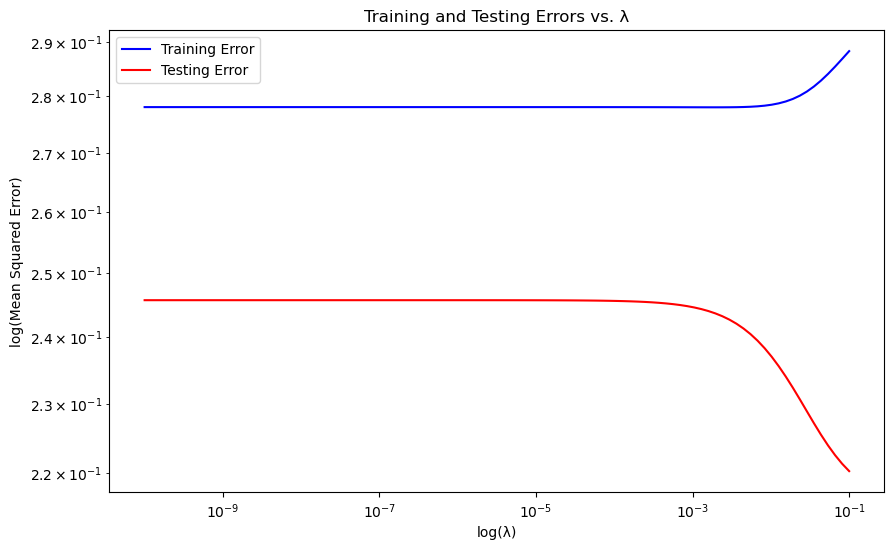

In [262]:
train_errors = np.array(train_errors)
test_errors = np.array(test_errors)

# Compute the mean errors across repetitions
mean_train_errors = np.mean(train_errors, axis=0)
mean_test_errors = np.mean(test_errors, axis=0)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot training error
plt.plot(lambda_values, mean_train_errors, label='Training Error', color='blue')

# Plot testing error
plt.plot(lambda_values, mean_test_errors, label='Testing Error', color='red')

# Set the x-axis to log scale
plt.xscale('log')

# Set the y-axis to log scale
plt.yscale('log')

# Labels and title
plt.xlabel('log(λ)')
plt.ylabel('log(Mean Squared Error)')
plt.title('Training and Testing Errors vs. λ')

# Display legend
plt.legend()

# Show the plot
plt.show()

## Observations

1. The training error (blue curve) remains almost constant across different 𝜆 values until it starts to increase for larger 𝜆 values.
2. The testing error remains constant for smaller values of 𝜆 which then decreases as 𝜆 increases 
3. At very small values of λ, the regularization effect is minimal, and the model is more complex. This can lead to overfitting the training data
4. At large values of λ, the regularization term starts penalizing large weights, which leads to a simpler model with less flexibility. This could possibly lead to underfitting of the data. 
5. The optimal valeu of λ close to 10^-1 as this is where testing error is minimised.